In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

C:\Users\gsuma\AppData\Local\Temp\ipykernel_11180\396974816.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df = pd.read_csv('dataset.csv')
df

,Date,Open,High,Low,Close,Adj_Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,31-01-2022,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,01-02-2022,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,02-02-2022,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,03-02-2022,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

In [6]:
df.shape

(1009, 7)

In [7]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj_Close    float64
Volume         int64
dtype: object

In [8]:
x = df[['Open']]
y = df.Adj_Close

In [9]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=5)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.25)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [12]:
from sklearn.metrics import *
r2_score(y_pred,y_test)

0.994774342554842

In [13]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test,y_pred)
meanSqErr = metrics.mean_squared_error(y_test,y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [14]:
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 5.85835226823856
Mean Square Error: 58.01190568065811
Root Mean Square Error: 7.616554711984817


In [15]:
X = df[['Open', 'Close']].values

In [16]:
clf = IsolationForest(contamination=0.05, random_state=42)
clf.fit(X)

IsolationForest(contamination=0.05, random_state=42)

In [17]:
y_pred = clf.predict(X)

In [18]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

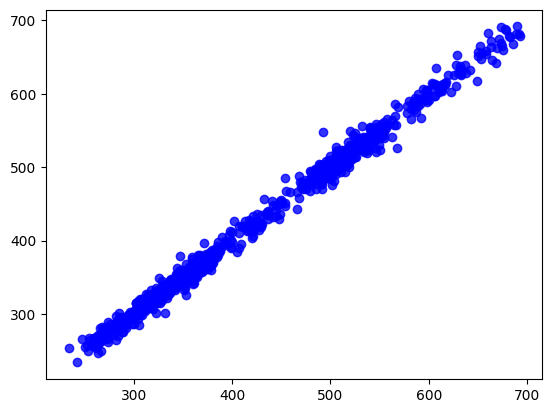

In [19]:
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Normal Data', alpha=0.8)

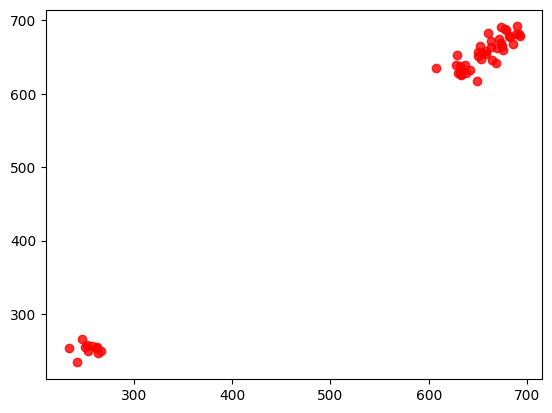

In [20]:
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], c='red', label='Anomalies', alpha=0.8)

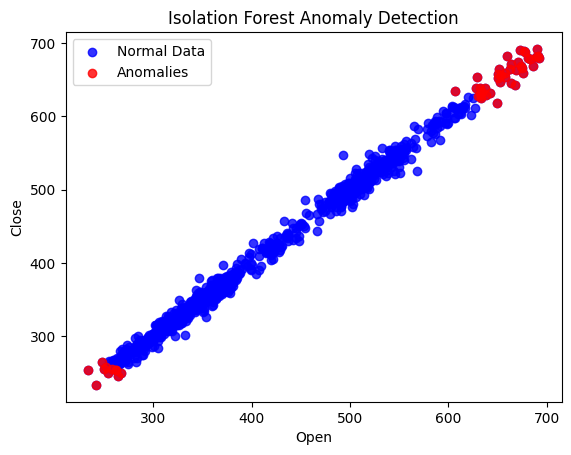

In [21]:
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Normal Data', alpha=0.8)
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], c='red', label='Anomalies', alpha=0.8)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Open')
plt.ylabel('Close')
plt.legend()
plt.show()

In [22]:
x = df[['Open']].values
y1 = df['Adj_Close'].values

In [23]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y1_train,y1_test = train_test_split(x,y1,random_state=5)

In [24]:
from sklearn.tree import DecisionTreeRegressor
dt1=DecisionTreeRegressor(random_state=0,criterion="absolute_error")
dt1.fit(x_train,y1_train)
pre1 = dt1.predict(x_test)

In [25]:
from sklearn.metrics import r2_score
r2_score(y1_test,pre1)

0.9876283875217345

In [26]:
print(dt1.predict([[298]]))

[301.779999]


In [28]:
import pickle
pickle.dump(dt1,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))